In [8]:
import pandas as pd
from pandas import Series,DataFrame
import scipy
from scipy.stats import spearmanr
import numpy as np
from pylab import rcParams 
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing, cross_validation, neighbors ,svm
from matplotlib import style
import seaborn as sns
import timeit
%matplot inline


UsageError: Line magic function `%matplot` not found.


In [18]:
sns.set()

In [19]:
y = df[["y"]]
x = df.drop(['y'],1)
x = x.values
y = y.values
x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y, test_size=0.2)

clf = svm.SVC()
clf.fit(x_train, y_train)


C:\Users\Anant\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
df = pd.read_csv('bank.csv', delimiter=";")

df = df[['age', 'job', 'marital', 'education', 'balance','housing', 'loan', 'duration', 'poutcome','y']]

def handle_non_numerical_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 1
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

df = handle_non_numerical_data(df)


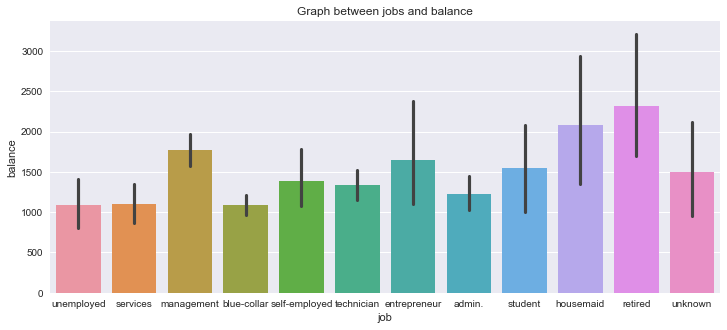

In [74]:
plt.subplots(figsize=(12,5))
sns.barplot(df['job'],df['balance'])
plt.title('Graph between jobs and balance')
plt.savefig('../firstgraph.png')